# Data understading 
+ number of example: 8067
+ number of features: 9 
+ number of output: 4
    {'D': 2268, 'A': 1972, 'B': 1858, 'C': 1970} 
+ missing data
+ correlation matrices
+ rate of non-missing values
+ pie elements in each features
+ use t-sne to show 2D features 


In [3]:
import pandas as pd
data = pd.read_csv('./data/automobile-customer.csv')
data

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Category 1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Category 4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Category 6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Category 6,B


<AxesSubplot:>

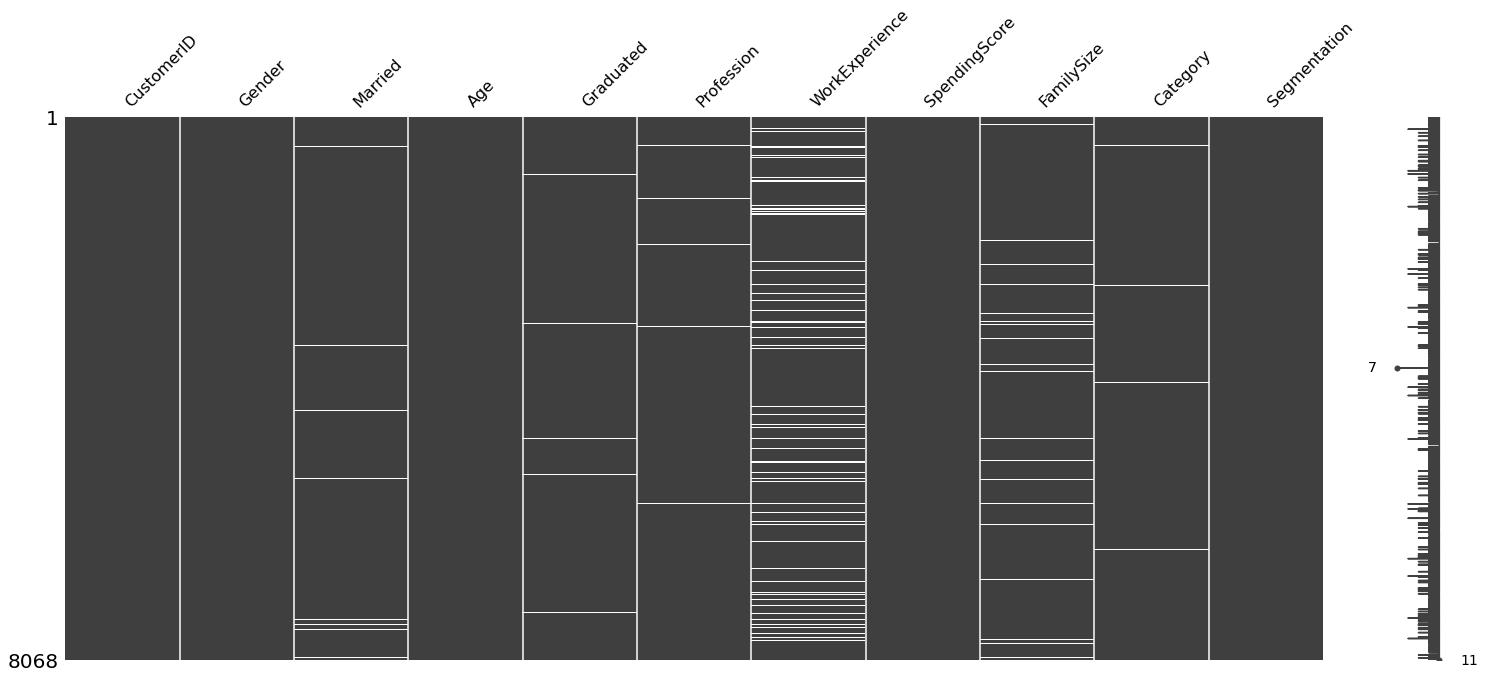

In [4]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

<AxesSubplot:>

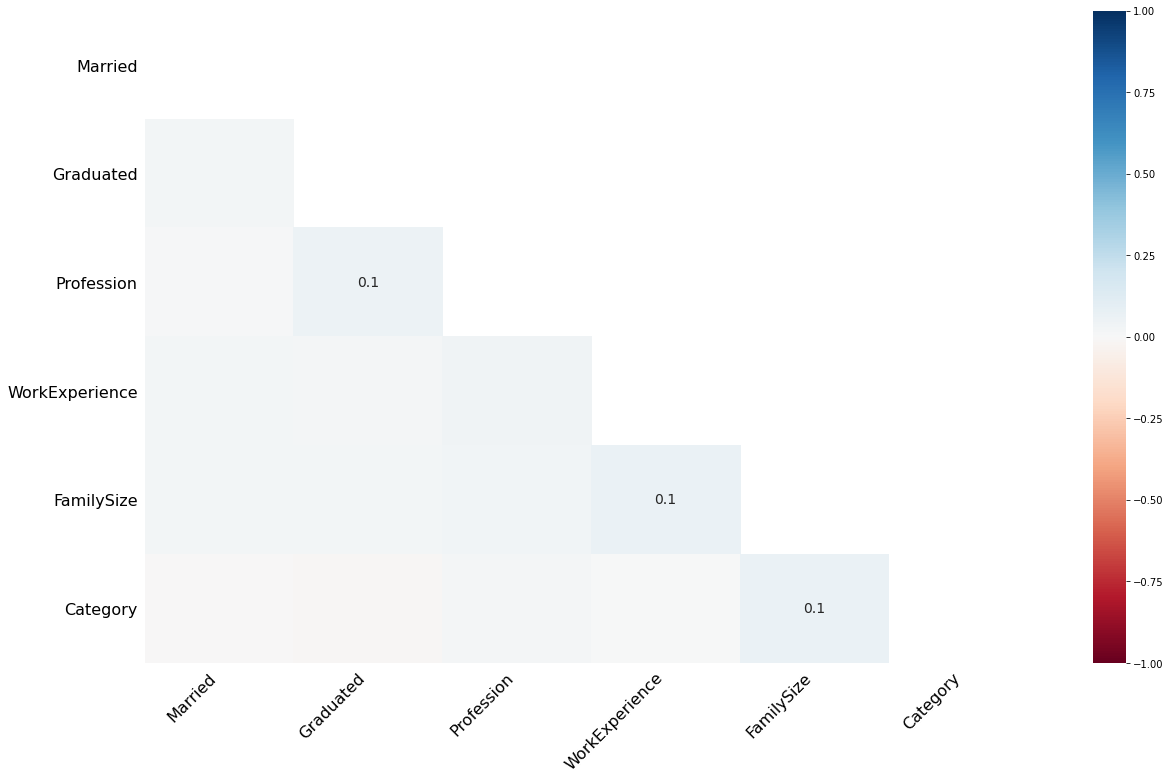

In [5]:
msno.heatmap(data)

<AxesSubplot:>

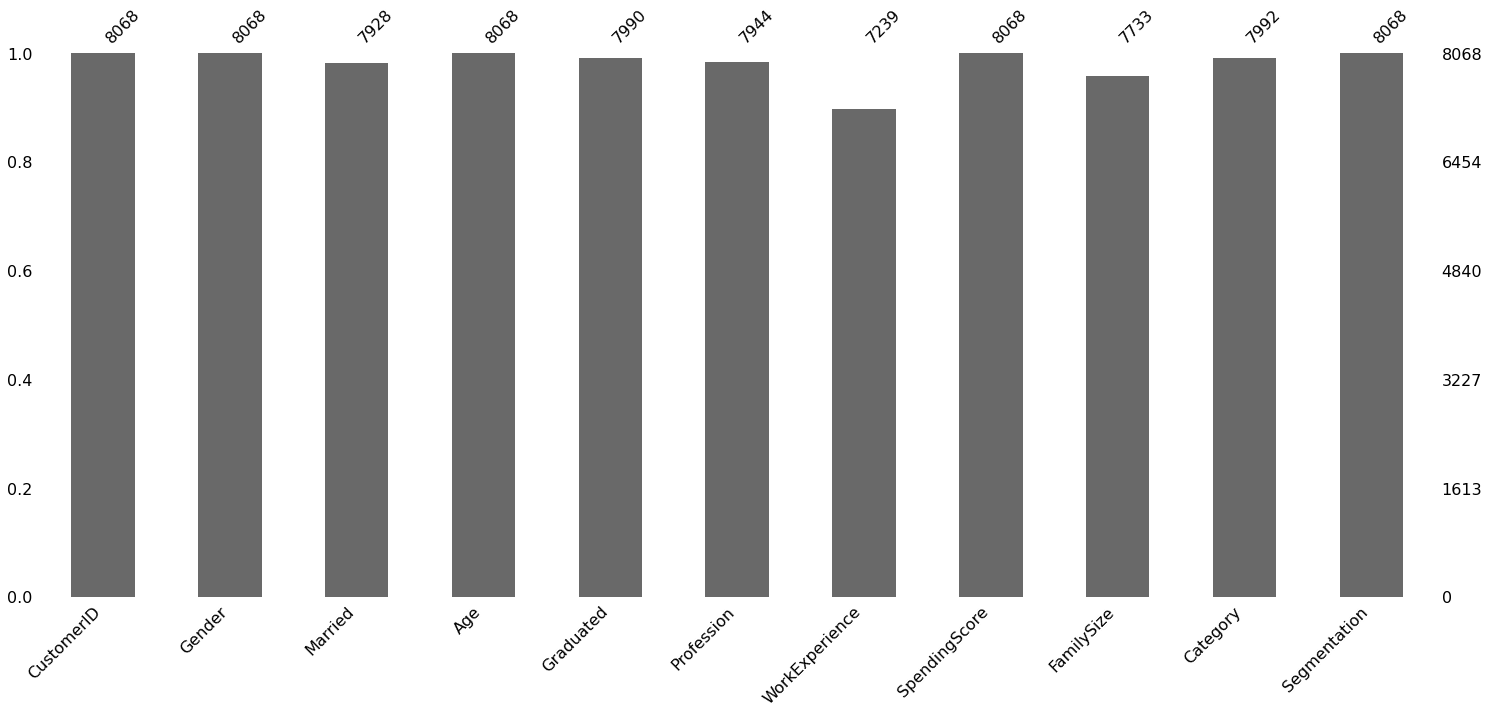

In [6]:
msno.bar(data)

In [7]:
import collections
columns = data.columns
dic_list =[]
for c in columns[1:]:
  df = data
  df[c] = df[c].fillna('N')
  dic_list.append(dict(collections.Counter(df[c])))
  print(dict(collections.Counter(df[c])))
i=0
for ar in df.values:
  if 'N' in ar:
    i+=1 
print('number N rows:', i)

{'Male': 4417, 'Female': 3651}
{'No': 3285, 'Yes': 4643, 'N': 140}
{22: 142, 38: 221, 67: 55, 40: 229, 56: 110, 32: 221, 33: 232, 61: 93, 55: 98, 26: 200, 19: 134, 70: 71, 58: 80, 41: 206, 31: 214, 79: 34, 49: 155, 18: 132, 36: 209, 35: 250, 45: 158, 42: 232, 83: 35, 27: 229, 28: 220, 47: 167, 29: 183, 57: 93, 76: 27, 25: 218, 72: 67, 48: 154, 74: 30, 59: 97, 39: 208, 51: 161, 30: 196, 63: 80, 52: 157, 60: 95, 68: 69, 86: 30, 50: 180, 43: 226, 80: 24, 37: 234, 46: 160, 69: 67, 78: 29, 71: 49, 82: 36, 23: 129, 20: 127, 85: 22, 21: 116, 53: 158, 62: 85, 75: 32, 65: 72, 89: 36, 66: 72, 73: 54, 77: 30, 87: 28, 84: 33, 81: 42, 88: 35}
{'No': 3022, 'Yes': 4968, 'N': 78}
{'Healthcare': 1332, 'Engineer': 699, 'Lawyer': 623, 'Entertainment': 949, 'Artist': 2516, 'Executive': 599, 'Doctor': 688, 'Homemaker': 246, 'Marketing': 292, 'N': 124}
{1.0: 2354, 'N': 829, 0.0: 2318, 4.0: 253, 9.0: 474, 12.0: 48, 3.0: 255, 13.0: 46, 5.0: 194, 8.0: 463, 14.0: 45, 7.0: 196, 2.0: 286, 6.0: 204, 10.0: 53, 11.0

In [8]:
import matplotlib.pyplot as plt
import numpy as np 
def piechart(dic, dic_name, i):
  # labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
  # sizes = [15, 30, 45, 10]
  # explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice 
  labels = [*dic.keys()]
  values = [*dic.values()]
  sizes = values/np.sum(values)
  if len(values)<100:
      fig1, ax1 = plt.subplots()
      print('dic name:', dic_name)
      ax1.set_title(dic_name)
      ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
              shadow=True, startangle=90)
      ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
      plt.show()


dic name: Gender


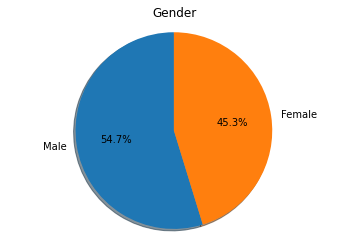

dic name: Married


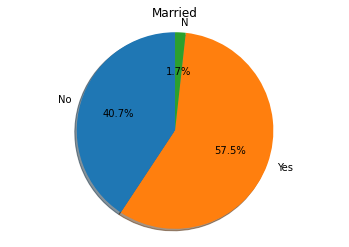

dic name: Age


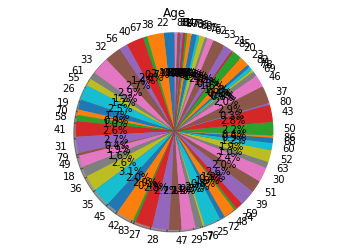

dic name: Graduated


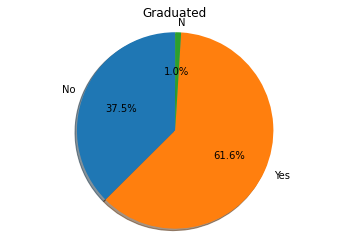

dic name: Profession


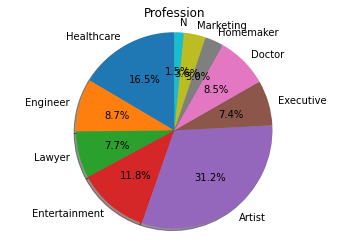

dic name: WorkExperience


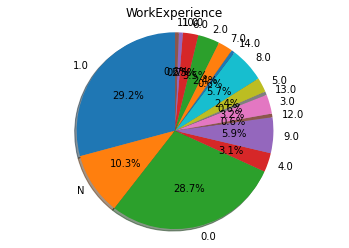

dic name: SpendingScore


/home/kael99/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  from ipykernel import kernelapp as app


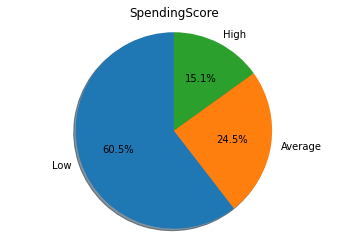

dic name: FamilySize


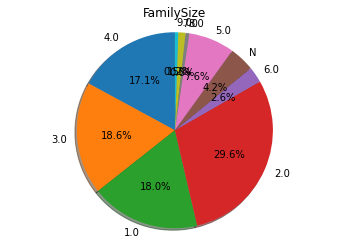

dic name: Category


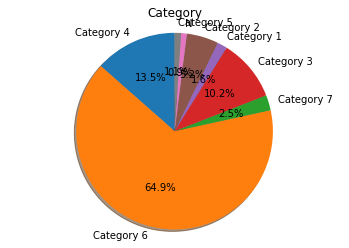

dic name: Segmentation


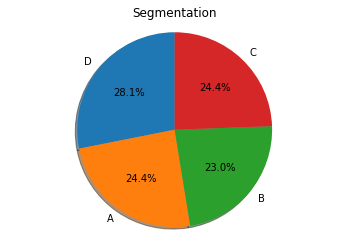

In [9]:
for i in range(len(dic_list)):
  piechart(dic_list[i], columns[i+1], i)

In [10]:
# def multichart(dic, dic_name, i):
#   # labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#   # sizes = [15, 30, 45, 10]
#   # explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice 
#   labels = [*dic.keys()]
#   values = [*dic.values()]
#   sizes = values/np.sum(values)
#   fig1, ax1 = plt.subplots(1,2)
#   if len(values)<100:
#       print('dic name:', dic_name)
#       ax1[0].set_title(dic_name)
#       ax1[0].pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
#               shadow=True, startangle=90)
#       ax1[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#       ax1[1].bar(labels, values, color='red')

#       plt.show()


#split data

In [12]:
import pandas as pd 
data  = pd.read_csv('./data/automobile-customer.csv')
data.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [15]:
%python3 split_data.py

UsageError: Line magic function `%python3` not found (But cell magic `%%python3` exists, did you mean that instead?).


In [ ]:
import collections
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('data:',dict(collections.Counter(data['Segmentation'])))
print('data',dict(collections.Counter(train['Segmentation'])))
print('data',dict(collections.Counter(test['Segmentation'])))


data: {'D': 2268, 'A': 1972, 'B': 1858, 'C': 1970}
data {'D': 1818, 'A': 1580, 'B': 1496, 'C': 1560}
data {'A': 392, 'D': 450, 'B': 362, 'C': 410}


# data processing
+ remove duplicate, nan rows
+ fill nan\
+ process nan problems
+ label encoder
+ normalization (age) - optional
+ PCA

### 7 ways handle missing values
https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e
+ delete
+ impute continuous variable with mean/median
+ impute categorical variable (replace with the most frequent category)
+ fill by last observation carried forward (LOCF) - time-series dataset
+ Use naive bayes, KNN, RandomForest but NB, KNN dont suppose for missing values in sklearn
+ Prediction of missing values - consider only as a proxy for the true values
+ imputation using Deep Learning Library(Datawig)- slow with large datasets
 


In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

def tsne_plot(targets, outputs,save_dir=None):
    # targets = targets.reshape(-1, 1)
    # outputs = outputs.reshape(-1, 1)
    num_class = np.unique(outputs)
    print('generating t-SNE plot...')
    # tsne_output = bh_sne(outputs)
    tsne = TSNE(random_state=0)
    tsne_output = tsne.fit_transform(outputs)

    df = pd.DataFrame(tsne_output, columns=['x', 'y'])
    df['targets'] = targets

    plt.rcParams['figure.figsize'] = 10, 10
    sns.scatterplot(
        x='x', y='y',
        hue='targets',
        palette=sns.color_palette("hls",4),
        data=df,
        marker='o',
        legend="full",
        alpha=0.5
    )

    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')

    # plt.savefig(os.path.join(save_dir,'tsne.png'), bbox_inches='tight')
    print('done!')

##1
+ remove duplicate, nan rows
+ process nan problems
+ label encoder
+ t-sne 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_train(data):
  df = data
  # df = data.drop(columns = 'WorkExperience')
  df =data.drop_duplicates(subset='CustomerID', keep='first', inplace=False)
  cache = {}
  for c in data.columns:
    if df[c].dtype=='object': 
        df[c] = df[c].fillna('N')
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        cache[str(c)] = lbl
  df.dropna(axis="rows", how="any", inplace=True)
  return df, cache

def preprocess_test(data, cache):
  df = data
  # df = data.drop(columns = 'WorkExperience')
  df = data.drop_duplicates(subset='CustomerID', keep='first', inplace=False)
  for c in data.columns:
    if df[c].dtype=='object': 
        df[c] = df[c].fillna('N')
        lbl = cache[c]
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        cache[str(c)] = lbl
  df.dropna(axis="rows", how="any", inplace=True)
  return df



##2
+ remove duplicate, 
+ impute missing data (continious and categorical)
+ label encoder

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_train(data):
  df = data
  # df = data.drop(columns = 'WorkExperience')
  df =data.drop_duplicates(subset='CustomerID', keep='first', inplace=False)
  cache = {}
  for c in data.columns:
    if df[c].dtype=='object': 
        df[c] = df[c].fillna('N')
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        cache[str(c)] = lbl
  df.dropna(axis="rows", how="any", inplace=True)
  return df, cache

def preprocess_test(data, cache):
  df = data
  # df = data.drop(columns = 'WorkExperience')
  df = data.drop_duplicates(subset='CustomerID', keep='first', inplace=False)
  for c in data.columns:
    if df[c].dtype=='object': 
        df[c] = df[c].fillna('N')
        lbl = cache[c]
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        cache[str(c)] = lbl
  df.dropna(axis="rows", how="any", inplace=True)
  return df

## Get XY

In [ ]:
import pandas as pd 

train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('train:', train.shape)
print('test:', test.shape)
print(train.columns)
train, cache = preprocess_train(train)
test = preprocess_test(test, cache)
print('after preprocess')
print('train:', train.shape)
print('test:', test.shape)

train: (6454, 11)
test: (1614, 11)
Index(['CustomerID', 'Gender', 'Married', 'Age', 'Graduated', 'Profession',
       'WorkExperience', 'SpendingScore', 'FamilySize', 'Category',
       'Segmentation'],
      dtype='object')
after preprocess
train: (5588, 11)
test: (1381, 11)


train: (5588, 11)
test: (1381, 11)
(5588, 7)
(5588,)
(1381, 7)
(1381, 1)
generating t-SNE plot...


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



done!


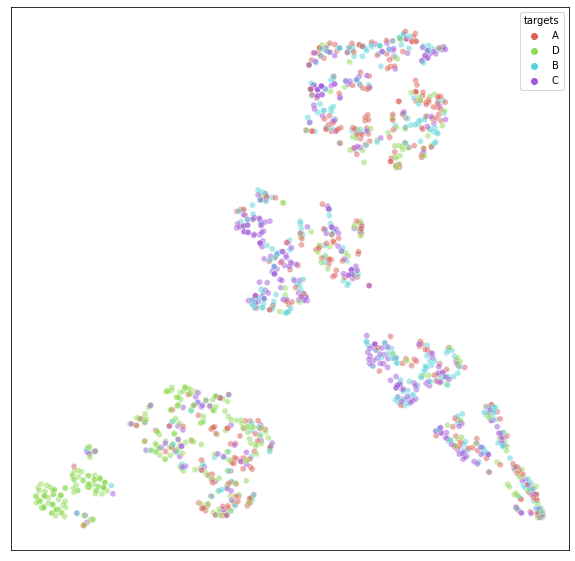

In [ ]:
import numpy as np
def create_XY(data):
  Y = data['Segmentation']
  X = data.drop(['Segmentation','CustomerID', 'Category','WorkExperience' ],axis=1)

  return X.values,Y.values
print('train:', train.shape)
print('test:', test.shape)
X,y = create_XY(train)
X_test, y_test = create_XY(test)
y_test = y_test.reshape(-1,1)
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)
# targets = np.concatenate(X_test, axis=0)
# outputs = np.concatenate(y_test, axis=0).astype(np.float64)
# print(targets.shape)
# print(outputs.shape)
targets = cache['Segmentation'].inverse_transform(y_test)
tsne_plot(targets, X_test,save_dir=None)

In [ ]:
import plotly.express as px
def plot3d(targets, outputs):
    tsne = TSNE(n_components=3, random_state=0)
    tsne_output = tsne.fit_transform(outputs)

    
    # projections = tsne.fit_transform(X_test )

    fig = px.scatter_3d(
        tsne_output, x=0, y=1, z=2,
        color=targets, labels={'color': 'targets'}
    )
    fig.update_traces(marker_size=8)
    fig.show()
le = LabelEncoder()
targets = cache['Segmentation'].inverse_transform(y_test)
plot3d(targets, X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# get XY from data

In [ ]:
import pandas as pd
from sklearn import preprocessing
data = pd.read_csv('data.csv')
data[:5]

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


## 1
+ drop 'CustomerID', 'WorkExperience', 'Category', 'Profession'
+ Dùng label encoder cho các thành phần còn lại 
=> acc = 48.22%

In [ ]:
from sklearn.preprocessing import LabelEncoder

data_ = data.drop(['CustomerID', 'WorkExperience', 'Category', 'Profession'], axis = 1 )
isscale = True #Model trong thư viện sklearn đã scale rồi
def preprocess_data(data):
  df = data
  # df = data.drop(columns = 'WorkExperience')
  cache = {}
  for c in data.columns:
    if df[c].dtype=='object': 
        df[c] = df[c].fillna('N')
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        cache[str(c)] = lbl
  df.dropna(axis="rows", how="any", inplace=True)
  return df, cache
df, cache= preprocess_data(data_)
df[:5]
X = df.drop(['Segmentation',],axis = 1).values
y = df['Segmentation'].values
if isscale:
    Xs = preprocessing.scale(X)
else:
    Xs = X

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2,random_state=0)
print('x train:', X_train.shape)
print('x test:', X_test.shape)
X_train[:5]


x train: (6186, 6)
x test: (1547, 6)


array([[-1.10723272,  0.82221445, -0.27004581,  0.76955046,  0.76877211,
        -0.55515897],
       [ 0.9031525 ,  0.82221445, -0.33018128,  0.76955046,  0.76877211,
        -0.55515897],
       [-1.10723272,  0.82221445,  0.75225714,  0.76955046, -1.57497507,
         0.75090867],
       [-1.10723272,  0.82221445,  0.21103793, -1.20750393,  0.76877211,
        -0.55515897],
       [ 0.9031525 ,  0.82221445,  0.4515798 ,  0.76955046,  0.76877211,
         0.09787485]])

##2
+ Thêm Profession nhưng dùng onehot
=> acc = 50.89

In [ ]:
from sklearn.preprocessing import LabelEncoder

data_ = data.drop(['CustomerID', 'WorkExperience', 'Category'], axis = 1 )
isscale = False #Model trong thư viện sklearn đã scale rồi
def preprocess_data(data):
  df = data
  # df = data.drop(columns = 'WorkExperience')
  cache = {}
  for c in data.columns:
    if df[c].dtype=='object' and c != 'Profession':
        df[c] = df[c].fillna('N')
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        cache[str(c)] = lbl
  df.dropna(axis="rows", how="any", inplace=True)
  df = pd.get_dummies(data,prefix=['Profession'], columns = ['Profession'], drop_first=False)
  return df, cache
df, cache= preprocess_data(data_)
df[:5]
X = df.drop(['Segmentation',],axis = 1).values
y = df['Segmentation'].values
if isscale:
    Xs = preprocessing.scale(X)
else:
    Xs = X

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2,random_state=0)
print('x train:', X_train.shape)
print('x test:', X_test.shape)
X_train[:5]


x train: (6096, 15)
x test: (1525, 15)


array([[ 1.,  2., 83.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.],
       [ 1.,  2., 55.,  2.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  2., 42.,  1.,  2.,  4.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 1.,  1., 27.,  1.,  2.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.],
       [ 1.,  1., 22.,  1.,  2.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.]])

##3
+ Tất cả feature đều dùng onehot
=> acc = 53.46%
+ Lên 54.91% khi thêm cột workexperiment
+ Lên 55.21% khi thêm cột category 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data_ = data.drop(['CustomerID'], axis = 1 ) #WorkExperience, , 'Category'
isscale = False #Model trong thư viện sklearn đã scale rồi
def preprocess_data(data):
  df = data
  # df = data.drop(columns = 'WorkExperience')
  cache = {}
  for c in data.columns:
    if df[c].dtype=='O' and c != 'Segmentation':
        print('O:',c )
        df = pd.get_dummies(df,prefix=[c], columns = [c], drop_first=False)
  lbl = LabelEncoder()
  lbl.fit(list(df.Segmentation.values))
  df.Segmentation = lbl.transform(df.Segmentation.values)
  cache['Segmentation'] = lbl
  df.dropna(axis="rows", how="any", inplace=True)
  return df, cache

df, cache= preprocess_data(data_)
df[:5]
X = df.drop(['Segmentation',],axis = 1).values
y = df['Segmentation'].values
if isscale:
    Xs = preprocessing.scale(X)
else:
    Xs = X

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2,random_state=0)
print('x train:', X_train.shape)
print('x test:', X_test.shape)
df[:5]
# X_train[:5]
# data[:5]
# y_train[:5]


O: Gender
O: Married
O: Graduated
O: Profession
O: SpendingScore
O: Category
x train: (5575, 28)
x test: (1394, 28)


,Age,WorkExperience,FamilySize,Segmentation,Gender_Female,Gender_Male,Married_No,Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,SpendingScore_Average,SpendingScore_High,SpendingScore_Low,Category_Category 1,Category_Category 2,Category_Category 3,Category_Category 4,Category_Category 5,Category_Category 6,Category_Category 7
0,22,1.0,4.0,3,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,67,1.0,1.0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,67,0.0,2.0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
5,56,0.0,2.0,2,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6,32,1.0,3.0,2,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


###Box plot

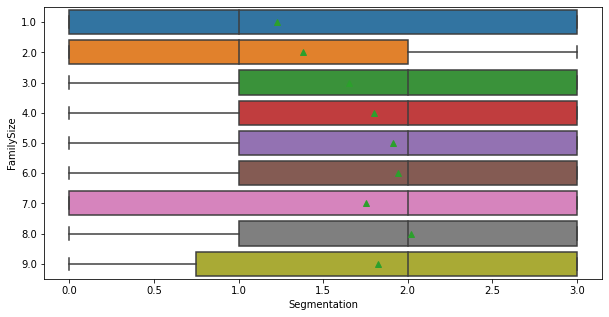

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(y = 'FamilySize', x = 'Segmentation', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)

(0.0, 5.0)

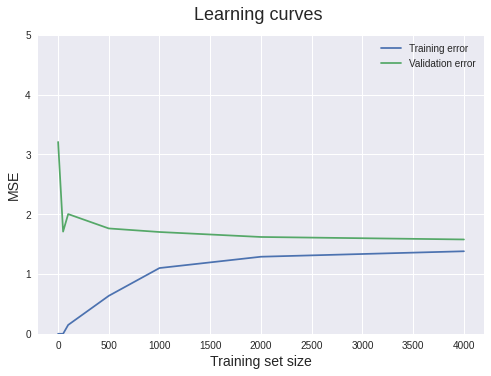

In [ ]:
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier

train_sizes = [1,50, 100, 500, 1000,2000, 4000]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = XGBClassifier(),
X = X_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves ', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,5)

#Train

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[3 1 1 ... 1 1 3]
[3 3 0 ... 1 0 3]
Accuracy: 55.21%


Accuracy: 48.99%


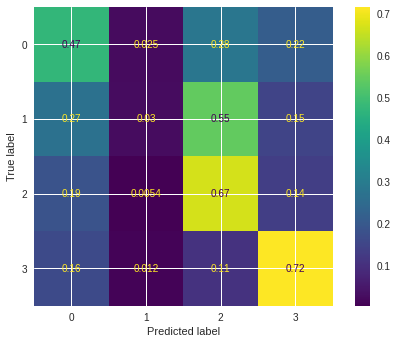

In [ ]:
from sklearn import svm
import numpy as np
from sklearn.metrics import plot_confusion_matrix

clf = svm.SVC()

clf.fit(X,y)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plot_confusion_matrix(clf, X_test, y_test, normalize='true')  

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1e5, solver = 'lbfgs', multi_class = 'multinomial')
clf.fit(X,y)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.49%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X, y)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 59.34%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.66%


#Random forest for missing data

In [ ]:
import pandas as pd 

data= pd.read_csv('data.csv')
data[:5]

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [ ]:
from sklearn.preprocessing import LabelEncoder

data_ = data.drop(['CustomerID', 'Category'], axis = 1 )
isscale = False #Model trong thư viện sklearn đã scale rồi
def preprocess_data(data):
  df = data
  # df = data.drop(columns = 'WorkExperience')
  cache = {}
  for c in data.columns:

    if df[c].dtype=='O' and c != 'Segmentation':
        # df[c] = df[c].fillna('N')
        print('O:',c )
        df = pd.get_dummies(df,prefix=[c], columns = [c], drop_first=False)

  lbl = LabelEncoder()
  lbl.fit(list(df.Segmentation.values))
  df.Segmentation = lbl.transform(df.Segmentation.values)
  cache['Segmentation'] = lbl
  df.dropna(axis="rows", how="any", inplace=True)
  return df, cache

df, cache= preprocess_data(data_)
df[:5]
X = df.drop(['Segmentation',],axis = 1).values
y = df['Segmentation'].values
if isscale:
    Xs = preprocessing.scale(X)
else:
    Xs = X

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2,random_state=0)
print('x train:', X_train.shape)
print('x test:', X_test.shape)
# df[:5]
# X_train[:5]
# data[:5]
# y_train[:5]

O: Gender
O: Married
O: Graduated
O: Profession
O: SpendingScore
x train: (5575, 24)
x test: (1394, 24)


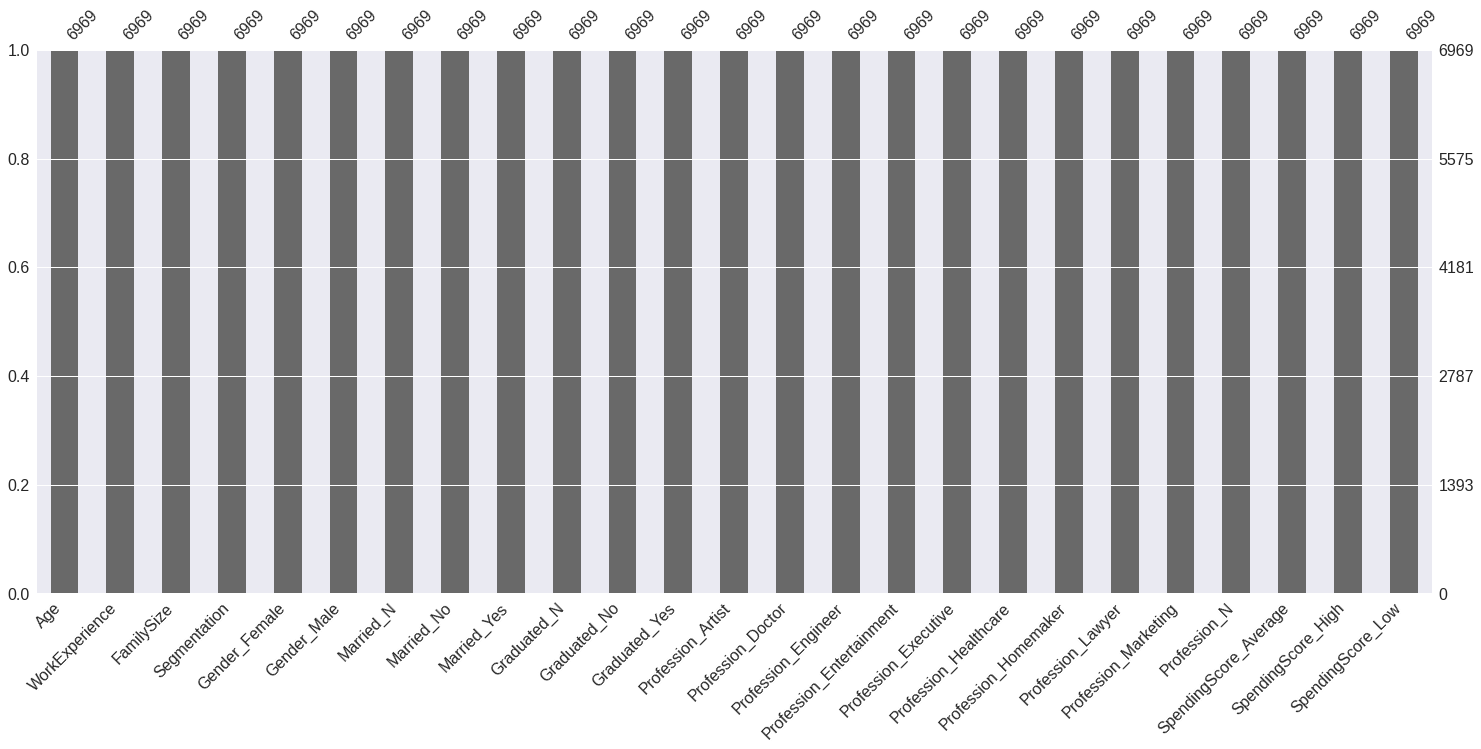

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df1 = data.fillna('N')
df1 = df1.dropna(axis="rows", how="any", inplace=True)

msno.bar(df1)

TypeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
x= X_test
x = x[np.logical_not(np.isnan(x))].reshape(-1,1)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: ignored